In [1]:
import matplotlib.pyplot as plt

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
#from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import re
from requests import get
from bs4 import BeautifulSoup

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


In [2]:
# Static Cities

#https://www.dw.com/en/top-10-germanys-largest-cities/g-52632011
biggest_cities_l = ["Berlin", "Hamburg", "Munich", "Cologne", "Frankfurt", "Stuttgart", "Düsseldorf", "Leipzig", "Dortmund", "Essen"]

city_links = { 'Essen': 'https://www.immowelt.de/regioinfos/ortsliste.aspx?geoid=10805113000',
'Dortmund': 'https://www.immowelt.de/regioinfos/ortsliste.aspx?geoid=10805913000',
'Leipzig': 'https://www.immowelt.de/regioinfos/ortsliste.aspx?geoid=10814365000',
'Düsseldorf': 'https://www.immowelt.de/regioinfos/ortsliste.aspx?geoid=10805111000',
'Stuttgart': 'https://www.immowelt.de/regioinfos/ortsliste.aspx?geoid=10808111000',
'Frankfurt am Main': 'https://www.immowelt.de/regioinfos/ortsliste.aspx?geoid=10806412000',
'Cologne': 'https://www.immowelt.de/regioinfos/ortsliste.aspx?geoid=10805315000',
'Munich': 'https://www.immowelt.de/regioinfos/ortsliste.aspx?geoid=10809162000',
'Hamburg': 'https://www.immowelt.de/regioinfos/ortsliste.aspx?geoid=108020',
'Berlin': 'https://www.immowelt.de/regioinfos/ortsliste.aspx?geoid=108110'
}

In [3]:
cities = {}
for city, link in city_links.items():
    cities[city] = []
    response = get(link)
    html_soup = BeautifulSoup(response.text, 'html.parser')
    for ultag in html_soup.find_all('ul', {'class': 'linklist_icon_01'}):
        for litag in ultag.find_all('li'):
            get_city = litag.text
            get_city = get_city.split(" ")
            cleaned_cities = re.sub('[()]', '', get_city[1])
            cities[city].append(cleaned_cities + ", " + get_city[0])

In [4]:
url = "https://de.wikipedia.org/wiki/{}"
city_dic = {}
for name in cities.keys():
    name = name.replace(" ", "_")
    
    # Data preparation
    if name == "Munich":
        name = "München"
    elif name == "Cologne":
        name = "Köln"
        
    div_box = "Vorlage_Infobox_Verwaltungseinheit_in_Deutschland"
    #prepare link
    n_link = url.format(name)
    print(n_link)
    content_dic = {}
    response = get(n_link)
    html_soup = BeautifulSoup(response.text, 'html.parser')
    check = html_soup.find_all('table', {'id': 'Vorlage_Infobox_Verwaltungseinheit_in_Deutschland'})
    if check:
        for tr in check:
            for td in tr.find_all('td'):
                if td.text.strip() == "Einwohner:":
                    population = (td.find_next('td').text.strip().split(" "))
                    population = int(population[0].replace(".", ""))
                    content_dic["Citizen"] = population
                if td.text.strip() == "Fläche:":
                    surface = (td.find_next('td').text.strip().split(" "))
                    content_dic["Surface"] = surface[0]
                    #print(population, name)
    else:
        for tr in check:
            for td in tr.find_all('td'):
                if td.text.strip() == "Einwohner:":
                    population = (td.find_next('td').text.strip().split(" ")[0])
                    population = int(population[0].replace(".", ""))
                    content_dic["Citizen"] = population
                if td.text.strip() == "Fläche:":
                    surface = (td.find_next('td').text.strip().split(" "))
                    content_dic["Surface"] = surface[0]
    city_dic[name] = content_dic

https://de.wikipedia.org/wiki/Essen
https://de.wikipedia.org/wiki/Dortmund
https://de.wikipedia.org/wiki/Leipzig
https://de.wikipedia.org/wiki/Düsseldorf
https://de.wikipedia.org/wiki/Stuttgart
https://de.wikipedia.org/wiki/Frankfurt_am_Main
https://de.wikipedia.org/wiki/Köln
https://de.wikipedia.org/wiki/München
https://de.wikipedia.org/wiki/Hamburg
https://de.wikipedia.org/wiki/Berlin


<h2> Berlin, Hamburg no match with scraping. Too short this up, hard code the data

In [5]:
city_dic["Berlin"]["Surface"] = '891,68\xa0km2'
city_dic["Berlin"]["Citizen"] = 3669491

city_dic["Hamburg"]["Surface"] = '755,22\xa0km2'
city_dic["Hamburg"]["Citizen"] = 1899160

# data normalization
for city in city_dic:
    value = city_dic[city]["Surface"]
    city_dic[city]["Surface"] = value.replace("\xa0km2", "")

city_dic

{'Essen': {'Surface': '210,34', 'Citizen': 582760},
 'Dortmund': {'Surface': '280,71', 'Citizen': 588250},
 'Leipzig': {'Surface': '297,8', 'Citizen': 593145},
 'Düsseldorf': {'Surface': '217,41', 'Citizen': 621877},
 'Stuttgart': {'Surface': '207,35', 'Citizen': 634830},
 'Frankfurt_am_Main': {'Surface': '248,31', 'Citizen': 761561},
 'Köln': {'Surface': '405,02', 'Citizen': 1087863},
 'München': {'Surface': '310,7', 'Citizen': 1484226},
 'Hamburg': {'Surface': '755,22', 'Citizen': 1899160},
 'Berlin': {'Surface': '891,68', 'Citizen': 3669491}}

<BarContainer object of 10 artists>

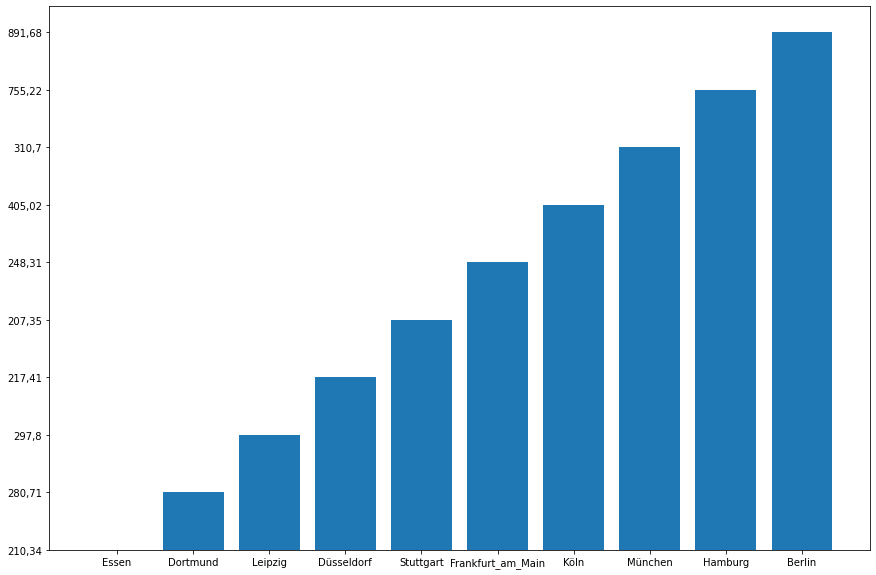

In [6]:
names = city_dic.keys()
values = [city_dic[i]["Surface"] for i in city_dic.keys()]

plt.figure(figsize=(50, 10))

plt.subplot(131)
plt.bar(names, values)

<BarContainer object of 10 artists>

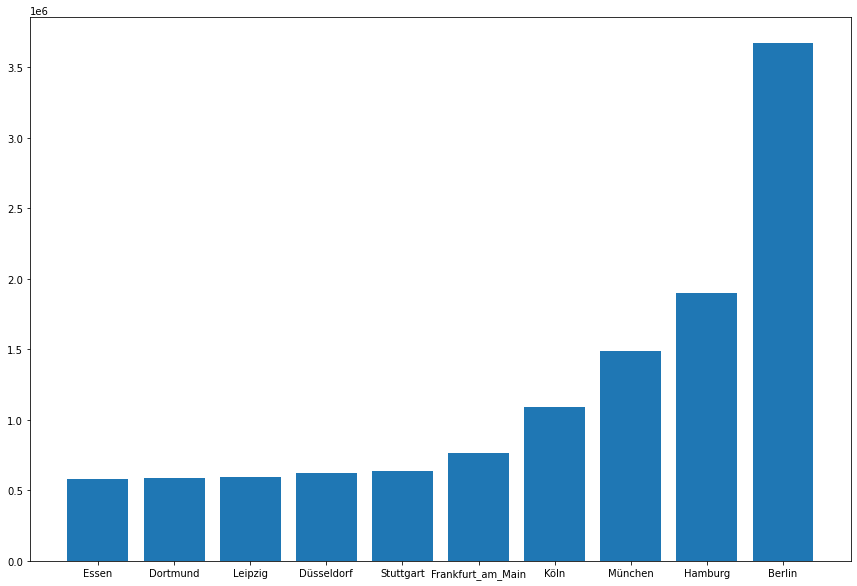

In [7]:
names = city_dic.keys()
values = [city_dic[i]["Citizen"] for i in city_dic.keys()]

plt.figure(figsize=(50, 10))

plt.subplot(131)
plt.bar(names, values)

In [8]:
l = [city_dic[i]["Citizen"] for i in city_dic.keys()]
l

[582760,
 588250,
 593145,
 621877,
 634830,
 761561,
 1087863,
 1484226,
 1899160,
 3669491]